In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['flavors_of_cacao.csv']


**Importing Visualization Libraries **

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Reading Data**

In [3]:
my_data= pd.read_csv('../input/flavors_of_cacao.csv')

In [4]:
my_data.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [5]:
my_data.describe()

,REF,Review Date,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [6]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company 
(Maker-if known)           1795 non-null object
Specific Bean Origin
or Bar Name    1795 non-null object
REF                                 1795 non-null int64
Review
Date                         1795 non-null int64
Cocoa
Percent                       1795 non-null object
Company
Location                    1795 non-null object
Rating                              1795 non-null float64
Bean
Type                           1794 non-null object
Broad Bean
Origin                   1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


**Changing Column Name**

In [7]:
my_data.columns = my_data.columns.str.lower().str.replace('\n', '_') # we used string function (str)

In [8]:
my_data.columns

Index(['company _(maker-if known)', 'specific bean origin_or bar name', 'ref',
       'review_date', 'cocoa_percent', 'company_location', 'rating',
       'bean_type', 'broad bean_origin'],
      dtype='object')

In [9]:
my_data.head(10) #default is 5 rows

,company _(maker-if known),specific bean origin_or bar name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


**Replacing Character**

In [10]:
my_data.cocoa_percent= my_data.cocoa_percent.str.replace('%','')

In [11]:
my_data.head()

,company _(maker-if known),specific bean origin_or bar name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad bean_origin
0,A. Morin,Agua Grande,1876,2016,63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70,France,3.50,,Peru


In [12]:
%timeit my_data.tail() #This is a convenient tool which runs multiple loops of the operation and reports it’s best performance time.

122 µs ± 635 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**Changing Column Data Type**

In [13]:
my_data.cocoa_percent = my_data.cocoa_percent.astype(float)

In [14]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
company _(maker-if known)           1795 non-null object
specific bean origin_or bar name    1795 non-null object
ref                                 1795 non-null int64
review_date                         1795 non-null int64
cocoa_percent                       1795 non-null float64
company_location                    1795 non-null object
rating                              1795 non-null float64
bean_type                           1794 non-null object
broad bean_origin                   1794 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 126.3+ KB


In [15]:
my_data.dtypes

company _(maker-if known)            object
specific bean origin_or bar name     object
ref                                   int64
review_date                           int64
cocoa_percent                       float64
company_location                     object
rating                              float64
bean_type                            object
broad bean_origin                    object
dtype: object

In [16]:
my_data.head()

,company _(maker-if known),specific bean origin_or bar name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad bean_origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru


**Correlation**

> **Correlation** is usually defined as a measure of the linear relationship between two quantitative variables (e.g., height and weight). When the values of one variable increase as the values of the other increase, this is known as positive correlation. When the values of one variable decrease as the values of another increase to form an inverse relationship, [this is known as negative correlation.

https://www.displayr.com/what-is-correlation/

In [17]:
my_data.corr()

,ref,review_date,cocoa_percent,rating
ref,1.000000,0.985076,0.037791,0.101030
review_date,0.985076,1.000000,0.038177,0.099846
cocoa_percent,0.037791,0.038177,1.000000,-0.164820
rating,0.101030,0.099846,-0.164820,1.000000


**Data Visualization**

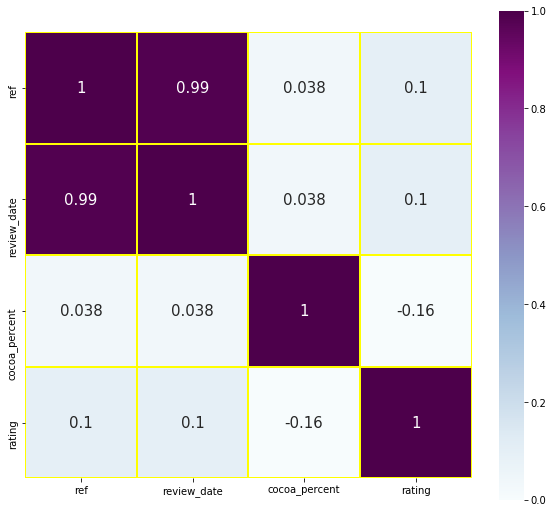

In [18]:
plt.figure(figsize=(10, 9))
sns.heatmap(my_data.corr(),cmap='BuPu',vmin=0,vmax=1,annot=True,annot_kws={'size':15},square=True,linewidths=1, linecolor='yellow')
#cmap adjusts the colormap used.
#Adjust the lower and upper contrast bounds with vmin and vmax. 
#Label the rectangles with annot=True, which also chooses a suitable text color
#annot_kws to change the text properties of the annotations. Like font_size
#linewidths = Width of the lines that will divide each cell.
#linecolor = Color of the lines that will divide each cell.
plt.show() 

**Filtering Data**

In [19]:
fil_data = my_data[(my_data.cocoa_percent > 70) & (my_data.cocoa_percent < 80)]

In [20]:
fil_data.head(10)

,company _(maker-if known),specific bean origin_or bar name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad bean_origin
28,Adi,"Vanua Levu, Ami-Ami-CA",705,2011,72.0,Fiji,3.50,Trinitario,Fiji
32,Akesson's (Pralus),"Bali (west), Sukrama Family, Melaya area",636,2011,75.0,Switzerland,3.75,Trinitario,Indonesia
33,Akesson's (Pralus),"Madagascar, Ambolikapiky P.",502,2010,75.0,Switzerland,2.75,Criollo,Madagascar
34,Akesson's (Pralus),"Monte Alegre, D. Badero",508,2010,75.0,Switzerland,2.75,Forastero,Brazil
36,Alain Ducasse,Vietnam,1215,2014,75.0,France,2.75,Trinitario,Vietnam
37,Alain Ducasse,Madagascar,1215,2014,75.0,France,3.00,Trinitario,Madagascar
38,Alain Ducasse,Chuao,1061,2013,75.0,France,2.50,Trinitario,Venezuela
39,Alain Ducasse,"Piura, Perou",1173,2013,75.0,France,2.50,,Peru
67,Amazona,"LamasdelChanka, San Martin, Oro Verde coop",1145,2013,72.0,Peru,3.25,,Peru
68,Amazona,"Bellavista Gran Pajeten, San Martin",1145,2013,73.0,Peru,3.50,Trinitario,Peru
